# Deep Learning & Applied AI

# Tutorial 1: Tensor manipulation

In this tutorial, we will cover:

- PyTorch Tensors: creation, gpu tensors, shape manipulation, indexing

Prerequisites:

- Python

Our info:

- Luca Moschella (moschella@di.uniroma1.it)
- Antonio Norelli (norelli@di.uniroma1.it)

Course:

- Website and notebooks will be available at https://erodola.github.io/DLAI-s2-2021/



## Introduction

Many Deep Learning frameworks have emerged for python. Arguably the most notable ones in 2021 are **TensorFlow** (with keras frontend), **PyTorch** and **Jax**. 
We will use PyTorch, which is [the leading DL framework](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/) for research and [continues to gain popularity](https://openai.com/blog/openai-pytorch/).

The fundamental data structure of these frameworks is the tensor, which is more or less the same everywhere. Gaining a solid understanding of how tensors work is required in deep learning and will definitely come in handy in other areas.

The first two tutorials will give you solid basics of tensors and operations between tensors.

## Numpy

The adoptive father of python's deep learning frameworks is Numpy, the historical library which added support for large, multi-dimensional arrays and matrices to Python.

As we will see, modern deep learning frameworks and especially PyTorch have drawn largely from Numpy's API, while at the same time overcoming its limitations, especially the absence of GPU support or automatic differentiation. The student has become the master.

![img](https://i.imgur.com/KaUdmee.png)

We will mainly use PyTorch  tensors for implementing our Deep Learning systems, but knowing how to use Numpy remains very important. Note that:

- Numpy arrays and PyTorch tensors are very similar, most of the features that we will explain for PyTorch tensors apply also to Numpy arrays.
- In real DL systems you need to constantly switch between PyTorch and Numpy.

If you have previous knowledge in Matlab, we recommend the [numpy for Matlab users page](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) as a useful resource.




In [3]:
import numpy as np

## PyTorch

During the course we'll use and learn many parts of its API.
You should also familiarize with the [PyTorch Documentation](https://pytorch.org/docs/stable/) as it will greatly assist you.




In [4]:
import torch
torch.__version__

'1.7.1+cu101'

### **PyTorch Tensor**

The ``Tensor`` class is very similar to numpy's ``ndarray`` and provides most of its functionality.


However, it also has two important distinctions:

- Support for GPU computations.
- Each tensor may store extra information needed to perform back propagation:
  - The gradient tensor w.r.t. some variable (e.g. the loss)
  - A node representing an operation in the computational graph that produced this tensor.


Keep in mind:

- Usually **tensor operations are not in-place**

#### **Tensor instantiation**

A tensor represents an n-dimensional grid of values, **all of the same type**. 

In [5]:
# Basic tensor creation from python lists
torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.int32)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [6]:
# Some other tensor construction methods
torch.zeros((3,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [7]:
torch.ones((2,5), dtype=torch.float64)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)

In [8]:
torch.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [9]:
torch.rand((2,2))

tensor([[0.9606, 0.4187],
        [0.0265, 0.1661]])

In [10]:
torch.randint(0, 100, (3,3))

tensor([[93, 68, 65],
        [78, 83, 58],
        [50, 53, 56]])

In [11]:
t = torch.rand((3, 3))
torch.ones_like(t)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

It is possible to easily convert to/from Numpy tensors:

In [12]:
t = torch.rand((3, 3), dtype=torch.float32)
t.numpy()

array([[0.5629712 , 0.4920603 , 0.10455066],
       [0.9878268 , 0.5129895 , 0.4251842 ],
       [0.3480274 , 0.93287164, 0.45150298]], dtype=float32)

In [13]:
n = np.random.rand(3,3).astype(np.float16)
torch.from_numpy(n)

tensor([[0.4922, 0.5830, 0.6875],
        [0.0100, 0.6733, 0.2006],
        [0.6938, 0.3950, 0.1936]], dtype=torch.float16)

There are many other functions available to create tensors!

> **EXERCISE**
>
> Create a matrix $M \in \mathbb{R}^{3 \times 3}$ that is filled with 2 along the diagonal and 1 elsewhere, that is:
>
> $$
m_{ij} =
\begin{cases}
2 & \text{if } i = j \\
1 & \text{otherwise}
\end{cases}
$$ 

In [14]:
# m = ?

#### **Tensor properties**

The **type** of a tensor is the type of each element contained in the tensor:

In [15]:
t = torch.rand((3, 3))
t.dtype

torch.float32


The **shape** of a tensor is a tuple of integers giving the size of the tensor along each dimension, e.g. for a matrix $M \in \mathbb{R}^{3 \times 5}$:

In [16]:
t = torch.rand((3,5))
t.shape

torch.Size([3, 5])

The **device** of a tensor indicates the memory in which the tensor currently resides: RAM (denoted as ``cpu``) or GPU memory (denoted as ``cuda``)

In [17]:
t = torch.rand((3,5))
t.device

device(type='cpu')

> **EXERCISE**
>
> Given a matrix $X \in \mathbb{R}^{m \times n}$, create another matrix $Y \in \mathbb{R}^{m \times 3}$ filled with ones.

In [18]:
# Exercise variables
x = torch.rand(100,42)
torch.ones_like(x).shape

# Your solution:
# y = ?

torch.Size([100, 42])

#### **Using the GPU**

Thanks to the explosion of the videogame industry in the last 50 years, the performance of the chips specialized in rendering and processing graphics --known as GPUs-- has dramatically improved.

In 2007 NVidia realized the potential of parallel GPU computing outside the videogame world, and released the first version of the CUDA framework, allowing  software developers to use GPUs for general purpose processing.

Graphics operations are mostly linear algebra operations, and accelerating them can turn very useful in many other fields.

In 2012 Hinton et al. [demonstrated](https://en.wikipedia.org/wiki/AlexNet) the huge potential of GPUs in training deep neural networks, starting *de facto* the glorious days of deep learning.

In [19]:
# @title GPUs are very powerful

from IPython.display import YouTubeVideo, HTML, display

display(YouTubeVideo('-P28LKWTzrI?t=14'))

In [20]:
# Check if the GPU is available
torch.cuda.is_available()

True

In [21]:
# If available use the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [22]:
t = torch.rand((3,3))
t = t.to(device)  # Pay attention to re-assign the variable!
t

tensor([[0.7781, 0.8219, 0.3025],
        [0.8717, 0.4836, 0.4636],
        [0.0486, 0.0582, 0.3912]], device='cuda:0')

In [23]:
# Construct tensors directly on the GPU memory
t = torch.ones((5, 5), device='cuda')
t

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0')

In [24]:
# Other methods to transfer tensors between devices
t = torch.rand((3,3))

In [25]:
# Be careful of hardcoded cuda calls: the code will not run if a GPU is not available
t = t.cuda()
t

tensor([[0.5571, 0.0251, 0.9604],
        [0.0766, 0.2523, 0.5611],
        [0.5686, 0.3900, 0.2396]], device='cuda:0')

In [26]:
t = t.cpu()
t

tensor([[0.5571, 0.0251, 0.9604],
        [0.0766, 0.2523, 0.5611],
        [0.5686, 0.3900, 0.2396]])

#### **Tensor rank**

In **Numpy** and **PyTorch** the **rank** means **number of dimensions** (different meaning in Linear Algebra!)

In [27]:
from typing import Union, Sequence

def print_arr(
    *arr: Sequence[Union[torch.Tensor, np.ndarray]], prefix: str = ""
) -> None:
    """Pretty print tensors, together with their shape and type

    :param arr: one or more tensors
    :param prefix: prefix to use when printing the tensors
    """
    print(
        "\n\n".join(
            f"{prefix}{str(x)} <shape: {x.shape}> <dtype: {x.dtype}>" for x in arr
        )
    )

- **rank-0** tensors are just scalars

In [28]:
t0 = torch.tensor(3, dtype=torch.double)

print_arr(t0) 

tensor(3., dtype=torch.float64) <shape: torch.Size([])> <dtype: torch.float64>


In [29]:
item = t0.item()  # convert tensor scalar to a python base type
item, type(item)

(3.0, float)

In [30]:
# Be careful, a non-scalar tensor cannot be converted with an .item() call
try:
  x = torch.ones(3).item()
except ValueError as e:
  print(e)

only one element tensors can be converted to Python scalars


- **rank-1** tensors of length ``n``have a shape of ``(n,)``

In [31]:
# A rank-1 array
t1 = torch.tensor([1, 2, 3])

print_arr(t1)

tensor([1, 2, 3]) <shape: torch.Size([3])> <dtype: torch.int64>


In [32]:
# A rank-1 array with a single scalar
print_arr(torch.tensor([42]))

tensor([42]) <shape: torch.Size([1])> <dtype: torch.int64>


In [33]:
# PyTorch and NumPy are smart: even if the tensor is not rank-0, if 
# it can "converted" in a rank-0 tensor the .item() will work
# This operation is called broadcasting, we will see it in detail in the next 
# lab.
torch.tensor([42]).item()

42

- **rank-2** tensors have a shape of ``(n, m)``

In [34]:
t2 = torch.tensor([[1, 2, 3], [4, 5, 6]])

print_arr(t2)

tensor([[1, 2, 3],
        [4, 5, 6]]) <shape: torch.Size([2, 3])> <dtype: torch.int64>


In [35]:
# A column vector is a rank-2 tensor
t_col = t1.reshape(-1, 1)

print_arr(t_col)

tensor([[1],
        [2],
        [3]]) <shape: torch.Size([3, 1])> <dtype: torch.int64>


In [36]:
# A row vector is a rank-2 tensor
t_row = t1.reshape(1, -1)

print_arr(t_row)

tensor([[1, 2, 3]]) <shape: torch.Size([1, 3])> <dtype: torch.int64>


> **NOTE**
>
> Rank-1 tensors can be both row and column tensors


- **rank-k** tensors have a shape of $(n_1, \dots, n_k)$

In [37]:
print_arr(torch.zeros((2, 3, 4)))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]) <shape: torch.Size([2, 3, 4])> <dtype: torch.float32>


In [38]:
print_arr(torch.ones((2, 2, 2, 2)))

tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]]) <shape: torch.Size([2, 2, 2, 2])> <dtype: torch.float32>


> **EXERCISE**
>
> Build a tensor $X \in \mathbb{R}^{k \times k}$ filled with zeros and the sequence $[0, ..., k-1]$ along the diagonal

In [39]:
# your solution
k = 7

> **EXERCISE**
>
> What is the shape of the following tensor?
> 
> ```python
> torch.tensor(
>     [
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>     ]
> )
> ```



In [40]:
# Think about it, then confirm your answer printing on your own: instantiate and print
# the shape of this tensor.

### **Changing and adding dimensions**

PyTorch provides several functions to manipulate tensor shapes


#### **Transpose dimension**

In [126]:
a = torch.ones((3, 5))
a[0, -1] = 0
print("a: ")
print_arr(a)

a: 
tensor([[1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) <shape: torch.Size([3, 5])> <dtype: torch.float32>


In [42]:
a.T

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 1., 1.]])

In [43]:
a.transpose(1, 0)  # Swap dimension 1 and 0

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 1., 1.]])

In [44]:
torch.einsum('ij -> ji', a)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [0., 1., 1.]])

It is possible to transpose in k-dimensions


In [45]:
a = torch.ones((2, 3, 6))
a[1, 2, 4] = 42
print_arr(a)

tensor([[[ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.]],

        [[ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1., 42.,  1.]]]) <shape: torch.Size([2, 3, 6])> <dtype: torch.float32>


In [46]:
a.transpose(2, 1)

tensor([[[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1., 42.],
         [ 1.,  1.,  1.]]])

In [47]:
torch.einsum('ijk->ikj', a)

tensor([[[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.]],

        [[ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.],
         [ 1.,  1., 42.],
         [ 1.,  1.,  1.]]])

In [127]:
# The shortcuts are handy, but your code becomes less readable.
# Most of the time readability is the most important goal to aim for

# What do you think a.T will do? (without looking at the docs!)
# a.T

# Spoiler: it if confusing even after reading the docs for tensor with shape >2
# Prefer readable code to short code!

> **NOTE**
>
> In Numpy the transpose function is different!
>
> PyTorch:
> `torch.transpose(input, dim0, dim1) → Tensor`
>
> NumPy:
> `numpy.transpose(a, axes=None) -> numpy.ndarray`
>
> Compare the docs from [numpy](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html) and [pytorch](https://pytorch.org/docs/stable/generated/torch.transpose.html)
>
> In PyTorch the transpose swaps two dimensions. In NumPy you can specify an entire mapping to shange all the dimensions.

In [49]:
a = np.arange(10).reshape(2, 5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [50]:
a.transpose(1, 0)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [51]:
a.transpose(0, 1)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [52]:
torch.from_numpy(a).transpose(0, 1)

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

In [53]:
# The einsum is cross platform. It works with consistent semantics
# pretty much everywhere: PyTorch, NumPy, TensorFlow, Jax, ...
# We will see the power of einsum in the next lab
np.einsum('ij -> ji', a)

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

#### **Reshape**

Another important feature is **reshaping** a tensor into different dimensions

- We need to make sure to **preserve the same number of elements**. 
- `-1` in one of the dimensions means **"figure it out"**.


Pay attention that **transposing and reshaping are two fundamentally different operations**:

In [54]:
a = torch.arange(12).reshape(3,4 )
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [55]:
# The classical transpose
a.t()

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])

In [56]:
# Reshape into the transpose shape
a.reshape(4, 3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

Think of the `reshape` operation as unrolling the tensor **row-wise**, to obtain a rank-1 tensor *(matlab users: matlab unrolls **column-wise**, pay attention when converting code!)*. Then organize the values in this tensor following the specified dimensions.

```python
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
```
$-$ unrolling $ \to $

```python
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

Then, reading the target shape from right to left, organize the values into the dimensions:

- e.g. reshape into `[4, 3]`:

```python
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

$-$ organize in groups of $3$ $ \to $

```python
tensor([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```

$-$ organize in groups of $4$ $ \to $

```python
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

# same shape of corresponding transpose but it **is** different
```

- e.g. reshape into `[2, 2, 3]`:

```python
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

$-$ organize in groups of $3$ $ \to $

```python
tensor([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```

$-$ organize in groups of $2$ $ \to $

```python
tensor([[[0,  1,  2],  [3,  4,  5]],  [[6,  7,  8],  [9, 10, 11]]])
```

$-$ organize in groups of $2$ $ \to $

```python
tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
```

In [57]:
a = torch.arange(12)
print_arr(a)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]) <shape: torch.Size([12])> <dtype: torch.int64>


In [58]:
a.reshape(6, 2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])

In [59]:
a.reshape(2, 6)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])

In [60]:
a.reshape(2, 2, 3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])

In [61]:
try:
  a.reshape(5, -1)
except RuntimeError as e:
  print(e)

shape '[5, -1]' is invalid for input of size 12


In [62]:
a.reshape(1, -1)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [63]:
a.reshape(-1, 1)

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11]])

In [64]:
a.reshape(-1)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

> **NOTE**
>
> We can add or remove dimensions of size `1` using `torch.unsqueeze` or `torch.squeeze`

In [65]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [66]:
a.unsqueeze(0).shape

torch.Size([1, 12])

In [67]:
a.unsqueeze(-1).shape

torch.Size([12, 1])

> **NOTE**
>
> Often the reshape does not require a physical copy of the data, but just a logical
> reorganization. 
>
> If you are curious about the NumPy/PyTorch tensor internals, a good starting point to learn about *strides* is this [SO answer](https://stackoverflow.com/questions/53097952/how-to-understand-numpy-strides-for-layman).
> tldr: often you can reshape tensors by changing only its strides and shape. The strides  are the byte-separation between consecutive items for each dimension.
>
> To be sure to obtain a *view* of the tensor, that shares the same underlying data, you can use the `torch.view` method.
> Its semantics is similar to `reshape`, but it works only on `contiguous` tensors and it guarantees that no copy will be performed.

#### **Concatenation**

PyTorch provides many functions to manipulate tensors. 
Two of the most common functions are:

- `torch.stack`: Concatenates a sequence of tensors along a new dimension.
- `torch.cat`: Concatenates a sequence of tensors in the given dimension.

In [68]:
a = torch.arange(12).reshape(3, 4)
b = torch.arange(12).reshape(3, 4) + 100
print_arr(a, b)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>

tensor([[100, 101, 102, 103],
        [104, 105, 106, 107],
        [108, 109, 110, 111]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>


In [69]:
out = torch.cat((a, b), dim=0)
print_arr(out)

tensor([[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11],
        [100, 101, 102, 103],
        [104, 105, 106, 107],
        [108, 109, 110, 111]]) <shape: torch.Size([6, 4])> <dtype: torch.int64>


In [70]:
out = torch.stack((a, b), dim=0)
print_arr(out)

tensor([[[  0,   1,   2,   3],
         [  4,   5,   6,   7],
         [  8,   9,  10,  11]],

        [[100, 101, 102, 103],
         [104, 105, 106, 107],
         [108, 109, 110, 111]]]) <shape: torch.Size([2, 3, 4])> <dtype: torch.int64>


> **EXERCISE**
>
> Given a rank-1 array of increasing numbers from `0` to `9`, defined as:
>
> ```python
> a = torch.arange(10)
> ```
>
> Use only the `reshape` and `transpose` functions to obtain the following tensor from `a`:
>
> ```python
> tensor([0, 2, 4, 6, 8, 1, 3, 5, 7, 9])
> ```

In [71]:
# Your solution

a = torch.arange(10)
print(a)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


> **EXERCISE**
>
> Given a tensor $X \in \mathbb{R}^{3 \times 1920 \times 5 \times 1080}$ reorganize it in order to obtain a tensor $Y \in \mathbb{R}^{5 \times 1920 \times 1080 \times 3}$
>
> Think of $X$ as a tensor that represents $5$ RGB images, each one with width $1920$ and height $1080$. Your goal is to reorganize this tensor in a sensible (and usable) way.


In [72]:
a = torch.rand(3, 1920, 5, 1080)
a.shape

torch.Size([3, 1920, 5, 1080])

### **Tensor indexing**

PyTorch offers several ways to index tensors


#### **Standard indexing**

As a standard Python list, PyTorch tensors support the python indexing conventions:

In [73]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
print(a[0])  # first element
print(a[1])  # second element

tensor(0)
tensor(1)


In [75]:
print(a[-1])  # last element
print(a[-2])  # second last element

tensor(9)
tensor(8)


#### **Multidimensional indexing**

Since tensors may be multidimensional, you can specify **one index for each dimension**:

In [76]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [77]:
a[1, 3]

tensor(8)

In [78]:
a[0]

tensor([0, 1, 2, 3, 4])

In [79]:
a[1]

tensor([5, 6, 7, 8, 9])

In [80]:
a[0, -1]

tensor(4)

#### **Slicing**

Similar to Python sequences and Numpy arrays, PyTorch tensors can be easily sliced using the slice notation:

```python
a[start:stop]  # items from start to stop-1
a[start:]      # items from start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a copy of the whole array
```

There is also an optional step value, which can be used with any of the above:

```python
a[start:stop:step] # from start to at most stop-1, by step
```

In [81]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
# Take the last 5 elements
a[-5:]

tensor([5, 6, 7, 8, 9])

In [83]:
# Index every element in an even index
a[::2]

tensor([0, 2, 4, 6, 8])

> **NOTE**
>
> The **slice syntax** is just a shortand.
>
> In Python everything is an object, even a ``slice``.
> It is possible to explicitly create a ``Slice`` object and reuse it to **index multiple tensors in the same way**:





In [84]:
# The signature follows the same pattern as above
s1 = slice(3)  # equivalent to the slice [:3]
s1

slice(None, 3, None)

In [85]:
type(s1)  # It is a built-in type

slice

In [86]:
out = a[s1]  # equivalent to a[:3]

print_arr(a, out)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) <shape: torch.Size([10])> <dtype: torch.int64>

tensor([0, 1, 2]) <shape: torch.Size([3])> <dtype: torch.int64>


In [87]:
mystring = 'this is just a string'
mystring[s1]

'thi'

In [88]:
s2 = slice(None, None, -1)
mystring[s2] 

'gnirts a tsuj si siht'

In [89]:
try:
  a[s2]  # PyTorch currently does not support negative steps
except ValueError as e:
  print(e)

step must be greater than zero


With multidimensional tensors we can perform **multidimensional slicing**:

In [90]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [91]:
# Take the second column
a[:, 1]

tensor([1, 6])

In [92]:
# Take the last column
a[:, -1]

tensor([4, 9])

In [93]:
# Take a slice from the last row
a[-1, -3:]

tensor([7, 8, 9])

You can **assign** to sliced tensors, therefore *modifying the original tensor*.

Indexing and slicing operations do their best to return tensors that **share the underlying data** with the original tensor.

In [94]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [95]:
b = a[0:2, 1:3]
b

tensor([[1, 2],
        [6, 7]])

In [96]:
b[-1, :] = -999
b

tensor([[   1,    2],
        [-999, -999]])

In [97]:
# The original tensor has been modified
a

tensor([[   0,    1,    2,    3,    4],
        [   5, -999, -999,    8,    9]])

In [98]:
a[-1, -1] = -1
a

tensor([[   0,    1,    2,    3,    4],
        [   5, -999, -999,    8,   -1]])

> **NOTE**
>
> Indexing with **integers yields lower rank tensors**

In [99]:
a = torch.arange(12).reshape(3, 4)
print_arr(a)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>


In [100]:
# Rank 1 view of the second row of a 
row_r1 = a[1, :]    
print_arr(row_r1)

tensor([4, 5, 6, 7]) <shape: torch.Size([4])> <dtype: torch.int64>


In [101]:
# Rank 2 view of the second row of a
row_r2 = a[1:2, :]
print_arr(row_r2)

tensor([[4, 5, 6, 7]]) <shape: torch.Size([1, 4])> <dtype: torch.int64>


In [102]:
# Rank 2 view of the second row of a
row_r3 = a[[1], :]
print_arr(row_r3)

tensor([[4, 5, 6, 7]]) <shape: torch.Size([1, 4])> <dtype: torch.int64>


In [103]:
# Same with the columns
print_arr(a[:, 1])
print_arr(a[:, [1]])

tensor([1, 5, 9]) <shape: torch.Size([3])> <dtype: torch.int64>
tensor([[1],
        [5],
        [9]]) <shape: torch.Size([3, 1])> <dtype: torch.int64>


#### **Integer array indexing**

It is a generalization of the slice: when you slice, the resulting tensor view will always be a subarray of the original tensor.

Integer array indexing allows you to construct arbitrary tensors, using the data from another tensor

In [104]:
a = torch.arange(1, 7).reshape(3, 2)
print_arr(a)

tensor([[1, 2],
        [3, 4],
        [5, 6]]) <shape: torch.Size([3, 2])> <dtype: torch.int64>


In [105]:
# Example of integer array indexing
# The returned array will have shape (3,)
b = a[[0, 1, 2], [0, 1, 0]]
print_arr(b)

tensor([1, 4, 5]) <shape: torch.Size([3])> <dtype: torch.int64>


In [106]:
# Equivalent to
v1, v2, v3 = a[0, 0], a[1, 1], a[2, 0]
b = torch.tensor([v1, v2, v3])
print_arr(b)

tensor([1, 4, 5]) <shape: torch.Size([3])> <dtype: torch.int64>


In [107]:
# You can re-use the same element of the source tensor multiple times!
print_arr(a[[0, 0], [1, 1]])
print_arr(torch.tensor([a[0, 1], a[0, 1]]))

tensor([2, 2]) <shape: torch.Size([2])> <dtype: torch.int64>
tensor([2, 2]) <shape: torch.Size([2])> <dtype: torch.int64>


In [108]:
# You can use another tensor to perform the indexing, 
# as long as they have dtype=torch.int64
i = torch.ones(3, dtype=torch.int64)
i

tensor([1, 1, 1])

In [109]:
j = torch.tensor([0, 1, 0])
j

tensor([0, 1, 0])

In [110]:
out = a[i, j]

print_arr(a, out)

tensor([[1, 2],
        [3, 4],
        [5, 6]]) <shape: torch.Size([3, 2])> <dtype: torch.int64>

tensor([3, 4, 3]) <shape: torch.Size([3])> <dtype: torch.int64>


> **EXERCISE**
>
> Change with a single assignment the elements in the tensor $X \in \mathbb{R}^{4 \times 3}$ as follows:
>
> `X[0,2] = -1`
>
> `X[1,1] = 0`
>
> `X[2,0] = 1`
>
> `X[3,1] = 2`



In [111]:
# Mutate one element from each row of a matrix
a = torch.arange(12).reshape(4, 3)
a

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

> **NOTE**
>
> **Slice indexing vs Array indexing**
>
> Be careful that slice indexing and array indexing are different operations!

In [112]:
a = torch.arange(16).reshape(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [113]:
a[0:3, 0:3]

tensor([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10]])

In [114]:
a[torch.arange(0,3), torch.arange(0,3)]

tensor([ 0,  5, 10])

In [115]:
a[[0, 1, 2], [0, 1, 2]]

tensor([ 0,  5, 10])

In [116]:
a[0:5:2, 0:5:2]

tensor([[ 0,  2],
        [ 8, 10]])

In [117]:
# With *slice indexing* you return a sub-tensor.

#### **Boolean array indexing**

This type of indexing is used to select the elements of a tensor that satisfy some condition (similar to MATLAB's logical indexing):

In [118]:
a = torch.arange(6).reshape(3, 2)
a

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [119]:
bool_idx = (a > 2)
bool_idx

tensor([[False, False],
        [False,  True],
        [ True,  True]])

In [120]:
a[bool_idx]

tensor([3, 4, 5])

If you want to know more about indexing in PyTorch and Numpy read the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

> **EXERCISE**
>
> Build a 3D tensor in $X \in \mathbb{R}^{k \times k \times k}$ that has ones along the 3D-diagonal and zeros elsewhere, i.e. a 3D identity.

> **EXERCISE**
>
> Build a 3D tensor $X \in \mathbb{R}^{w \times h \times 3}$ representing a $w \times h$ image with `(r, g, b)` color channels. Assume the color channel is the last dimension in the tensor and each color component $c \in [0, 1]$.
>
> Color the image $X$ completely by red, i.e. `(1, 0, 0)` in the `(r, g, b)` format.

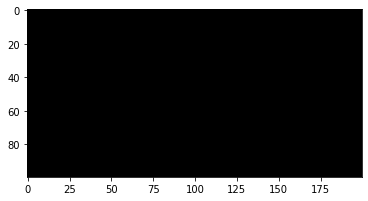

In [121]:
# Create and visualize a black image
x = torch.zeros(100, 200, 3)

%matplotlib inline
import matplotlib.pyplot as plt
img = plt.imshow(x)

In [122]:
# y = ?
# img = plt.imshow(y)

> **EXERCISE**
>
> Given the GitHub logo $X \in \mathbb{R}^{560 \times 560}$, change the black-ish color into light gray: $0.8$.  Assume the logo is in gray scale, with the color $c \in [0, 1]$ (remember 0 $\to$ black).
>
> Then draw a diagonal and anti-diagonal black line (i.e. an X) on the new image, to mark that the new logo is wrong.

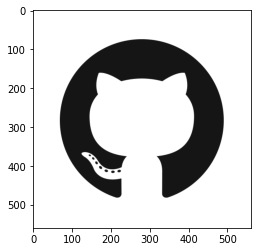

In [123]:
from skimage import io

image = io.imread('https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png', as_gray=True)
_ = plt.imshow(image, cmap='gray', vmin=0, vmax=1)

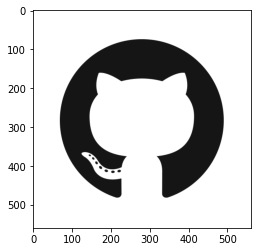

In [124]:
# Change the black into light-gray
X = torch.from_numpy(image.copy())  # PyTorch CPU and Numpy share the memory!
# ?
_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)

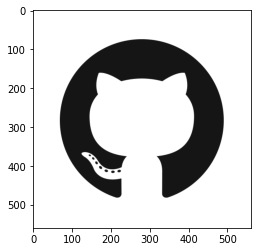

In [125]:
# Mark the new image as wrong with a big black X
# ?
_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)